# Getting Started Code for [F1 Team Classification Challenge](https://www.aicrowd.com/challenges/team-classification) on AIcrowd

## Download Necessary Packages 📚

In [ ]:
!pip install --upgrade fastai 
!pip install aicrowd-cli

## Download Data ⏬
The first step is to download out train test data. We will be training a model on the train data and make predictions on test data. We submit our predictions.


In [ ]:
API_KEY = '' #Please enter your API Key from [https://www.aicrowd.com/participants/me]
!aicrowd login --api-key $API_KEY

API Key valid
Saved API Key successfully!


In [ ]:
!aicrowd dataset download --challenge f1-team-classification -j 3 

test.zip:   0% 0.00/97.7M [00:00<?, ?B/s]
train.csv:   0% 0.00/569k [00:00<?, ?B/s]

sample_submission.csv:   0% 0.00/134k [00:00<?, ?B/s]

sample_submission.csv: 100% 134k/134k [00:00<00:00, 349kB/s]

train.csv: 100% 569k/569k [00:00<00:00, 868kB/s]
test.zip:  34% 33.6M/97.7M [00:02<00:04, 13.3MB/s]
val.csv:   0% 0.00/52.9k [00:00<?, ?B/s]
val.csv: 100% 52.9k/52.9k [00:00<00:00, 277kB/s]

train.zip:   0% 0.00/391M [00:00<?, ?B/s]

test.zip: 100% 97.7M/97.7M [00:05<00:00, 16.6MB/s]


val.zip:  86% 33.6M/38.9M [00:02<00:00, 13.2MB/s]

val.zip: 100% 38.9M/38.9M [00:02<00:00, 14.0MB/s]

train.zip:   9% 33.6M/391M [00:05<00:53, 6.65MB/s]
train.zip:  17% 67.1M/391M [00:09<00:42, 7.60MB/s]
train.zip:  26% 101M/391M [00:12<00:34, 8.45MB/s] 
train.zip:  34% 134M/391M [00:16<00:29, 8.61MB/s]
train.zip:  43% 168M/391M [00:22<00:31, 7.04MB/s]
train.zip:  52% 201M/391M [00:25<00:23, 7.92MB/s]
train.zip:  60% 235M/391M [00:29<00:19, 8.19MB/s]
train.zip:  69% 268M/391M [00:33<00:14, 8.19MB/s]
train.

Below, we create a new directory to put our downloaded data! 🏎

We unzip the ZIP files and move the CSVs.

In [ ]:
!rm -rf data
!mkdir data

!unzip train.zip  -d data/train
!unzip val.zip -d data/val
!unzip test.zip  -d data/test

!mv train.csv data/train.csv
!mv val.csv data/val.csv
!mv sample_submission.csv data/sample_submission.csv

In [ ]:
!rm -rf ./train.zip ./val.zip ./test.zip


## Import packages

In [ ]:
import pandas as pd
from fastai.vision.all import *
from fastai.data.core import *
import os

## Load Data
- We use pandas 🐼 library to load our data.   
- Pandas loads the data into dataframes and facilitates us to analyse the data.   
- Learn more about it [here](https://www.tutorialspoint.com/python_data_science/python_pandas.htm) 🤓

In [ ]:
data_folder = "data"

In [ ]:
train_df = pd.read_csv(os.path.join(data_folder, "train.csv"))

## Visualize the data 👀

Using Pandas and the Matplot Library in Python, we will be viewing the images in our datasets.

In [ ]:
train_df

ImageID     label
0            0   redbull
1            1  mercedes
2            2   redbull
3            3   redbull
4            4   redbull
...        ...       ...
39995    39995   redbull
39996    39996   redbull
39997    39997   redbull
39998    39998   redbull
39999    39999   redbull

[40000 rows x 2 columns]

Adding .jpg to all the ImageIDs in "ImageID" column. This will help us with adding the path behind the names of these images.

In [ ]:
train_df['ImageID'] = train_df['ImageID'].astype(str)+".jpg"
train_df

ImageID     label
0          0.jpg   redbull
1          1.jpg  mercedes
2          2.jpg   redbull
3          3.jpg   redbull
4          4.jpg   redbull
...          ...       ...
39995  39995.jpg   redbull
39996  39996.jpg   redbull
39997  39997.jpg   redbull
39998  39998.jpg   redbull
39999  39999.jpg   redbull

[40000 rows x 2 columns]

In [ ]:
train_df['label'].value_counts()

redbull     20043
mercedes    19957
Name: label, dtype: int64

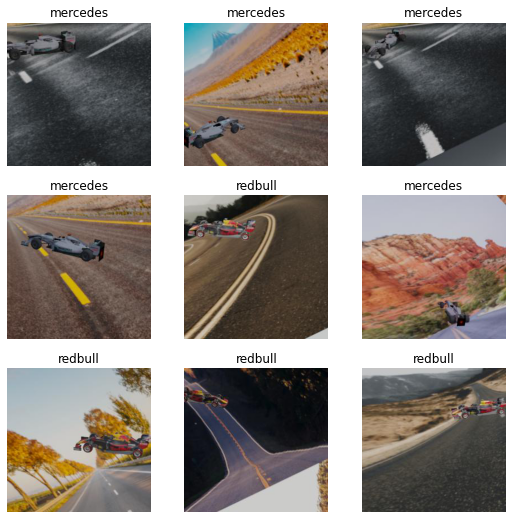

In [ ]:
dls = ImageDataLoaders.from_df(train_df, path=os.path.join(data_folder, "train"), bs=16)

# Defining a function to take a look at the images
dls.show_batch()

# TRAINING PHASE 🏋️
Now that we have the dataset is ready, it's time to create a model that we will train on our data!

In [ ]:
# learn = cnn_learner(dls, alexnet, metrics=F1Score())
learn = cnn_learner(dls, models.resnet18, pretrained=True,  metrics=F1Score()) #, lr=0.0001

## Train the Model 🏃🏽‍♂️

In [ ]:
learn.fine_tune(1) #1, base_lr=0.0001

# Testing Phase 😅

We are almost done. We trained and validated on the training data. Now its the time to predict on test set and make a submission.

## Load Test Set

Load the test data on which final submission is to be made.

In [ ]:
test_imgs_name = get_image_files(os.path.join(data_folder, "test"))
test_dls = dls.test_dl(test_imgs_name)

# Convert categorical values into label names
class_to_label_mapping = {v: k for v, k in enumerate(dls.vocab)}
print(class_to_label_mapping)

test_img_ids = [re.sub(r"\D", "", str(img_name)) for img_name in test_imgs_name]

{0: 'mercedes', 1: 'redbull'}


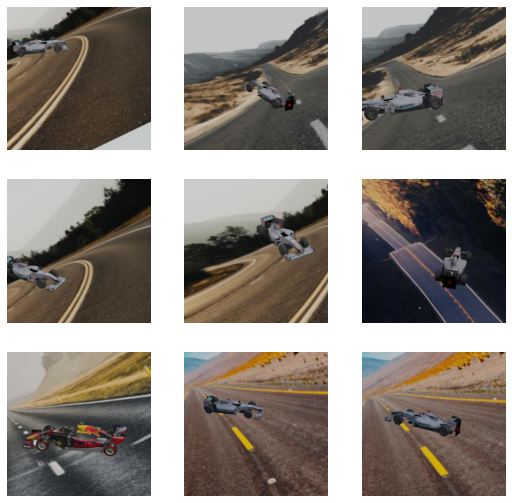

In [ ]:
test_dls.show_batch()

## Predict Test Set
Predict on the test set and you are all set to make the submission!

In [ ]:
_,_,results = learn.get_preds(dl = test_dls, with_decoded = True)

results = [class_to_label_mapping[i] for i in results.numpy()]

## Save the prediction to csv

### 🚧 Note :    
- Do take a look at the submission format.   
- The submission file should contain a header.   
- Follow all submission guidelines strictly to avoid inconvenience.

In [ ]:
submission = pd.DataFrame({"ImageID":test_img_ids, "label":results})
submission

ImageID     label
0       8847  mercedes
1       7457  mercedes
2       7911  mercedes
3        703  mercedes
4       5389  mercedes
...      ...       ...
9995    1310   redbull
9996    9804  mercedes
9997    6191   redbull
9998     823  mercedes
9999    3724  mercedes

[10000 rows x 2 columns]

In [ ]:
submission.to_csv("submission.csv", index=False)

## Making Direct Submission thought Aicrowd CLI

In [ ]:
#!aicrowd submission create -c f1-team-classification -f submission.csv

submission.csv ━━━━━━━━━━━━━━━━━━ 100.0% • 135.1/133.4 KB • 614.4 kB/s • 0:00:00
                                                    ╭─────────────────────────╮                                                     
                                                    │ Successfully submitted! │                                                     
                                                    ╰─────────────────────────╯                                                     
                                                          Important links                                                           
┌──────────────────┬───────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│  This submission │ https://www.aicrowd.com/challenges/ai-blitz-8/problems/f1-team-classification/submissions/136936              │
│                  │                                                                                                     